## Проект: Линейные модели в машинном обучении

**Цель проекта:**

Разработать модель машинного обучения, которая поможет управлять рисками и принимать объективное решение о покупке коров

**Описание данных:**

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент:

* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера:

* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

Файл cow_buy.csv содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:

* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**План проекта:**

1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Проведите корреляционный анализ признаков в датасете ferma_main.csv
5. Задача регрессии
6. Задача классификации
7. Общий вывод

## Загрузка данных

In [ ]:
# Импортируем библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix,
    r2_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    classification_report
)

In [ ]:
# Загрузка данных
try:
    df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal = ',')
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal = ',')
    df_cow = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')
except:
    df_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';', decimal = ',')
    df_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';', decimal = ',')
    df_cow = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';', decimal = ',')

In [ ]:
# Посмотрим содержимое датасетов
display(df_main,df_dad,df_cow)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [ ]:
# Общая характеристика датафрейма
display(df_main.info(),df_dad.info(),df_cow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

None

None

In [ ]:
print(f"Количество полных дубликатов:\n"
   f"df_main: {df_main.duplicated().sum()}\n"
   f"df_dad: {df_dad.duplicated().sum()}\n"
   f"df_cow: {df_cow.duplicated().sum()}")

Количество полных дубликатов:
df_main: 5
df_dad: 0
df_cow: 4


Выводы по этапу "Загрузка данных":

* В таблице с коровами фермера хранится 634 записи и 12 столбцов. В записях неправильный тип данных некоторых столбцов;
* Датафрейм с именами отцов коров содержит 629 записей и 2 столбца, что указывает на присутствие пропусков или дубликатов в датайрейме с коровами фермера;
* В данных о коровах для покупки 20 записей и 7 столбцов. В записях неправильный тип данных некоторых столбцов;
* Среди данных таблиц нет пропусков, но в некоторых таблицах(df_main, df_cow) есть дубликаты;
* Наименования столбцов во всех датафреймах необходимо изменить на латиницу в нижний регистр.

##  Предобработка данных

### Измнение навзания столбцов

In [ ]:
# переименование столбцов
df_main.columns = ['id', 'yield', 'efu', 'raw_protein', 'spo', 'breed', 'type_pasture', 'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age']
df_dad.columns = ['id', 'dad_name']
df_cow.columns = ['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content', 'protein', 'age']

# проверка названий столбцов
print(f'''
    {df_main.columns},
    {df_dad.columns},
    {df_cow.columns}
''')


    Index(['id', 'yield', 'efu', 'raw_protein', 'spo', 'breed', 'type_pasture',
       'dad_breed', 'fat_content', 'protein', 'taste_milk', 'age'],
      dtype='object'),
    Index(['id', 'dad_name'], dtype='object'),
    Index(['breed', 'type_pasture', 'dad_breed', 'dad_name', 'fat_content',
       'protein', 'age'],
      dtype='object')



### Поиск и обработка пропусков

In [ ]:
print(f'''Количество пропусков в df_main:
{df_main.isna().sum()}

Количество пропусков в df_dad:
{df_dad.isna().sum()}

Количество пропусков в df_cow:
{df_cow.isna().sum()}
''')

Количество пропусков в df_main:
id              0
yield           0
efu             0
raw_protein     0
spo             0
breed           0
type_pasture    0
dad_breed       0
fat_content     0
protein         0
taste_milk      0
age             0
dtype: int64

Количество пропусков в df_dad:
id          0
dad_name    0
dtype: int64

Количество пропусков в df_cow:
breed           0
type_pasture    0
dad_breed       0
dad_name        0
fat_content     0
protein         0
age             0
dtype: int64



### Поиск и обработка полных/неявных дубликатов

На этапе загрузки данных выяснили, что Количество полных дубликатов: df_main: 5, df_dad: 0, df_cow: 4

In [ ]:
# Удаление дубликатов
df_main = df_main.drop_duplicates(keep='first')
df_cow = df_cow.drop_duplicates(keep='first')

# проверка дубликатов
print(f'''Количество полных дубликатов в df_main: {df_main.duplicated().sum()}\n
Количество полных дубликатов в df_cow: {df_cow.duplicated().sum()}''')

Количество полных дубликатов в df_main: 0

Количество полных дубликатов в df_cow: 0


In [ ]:
# Столбцы для поиска неявных дубликатов
key_cols_main = ['breed', 'type_pasture', 'dad_breed']

for col in key_cols_main:
    unique_values = df_main[col].unique()
    print(f"Уникальные значения в столбце '{col}': {unique_values}")

Уникальные значения в столбце 'breed': ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце 'type_pasture': ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в столбце 'dad_breed': ['Айдиал' 'Соверин' 'Айдиалл']


In [ ]:
# Переименование неявных дубликатов для датафрейма df_main
df_main.loc[df_main['type_pasture'] == 'Равнинные', 'type_pasture'] = 'Равнинное'
df_main.loc[df_main['dad_breed'] == 'Айдиалл', 'dad_breed'] = 'Айдиал'

# повторная проверка уникальных значений
for col in key_cols_main:
    unique_values = df_main[col].unique()
    print(f"Уникальные значения в столбце '{col}': {unique_values}")

Уникальные значения в столбце 'breed': ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце 'type_pasture': ['Равнинное' 'Холмистое']
Уникальные значения в столбце 'dad_breed': ['Айдиал' 'Соверин']


In [ ]:
# проверка дубликатов в dad_name
df_dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [ ]:
# Столбцы для поиска неявных дубликатов
key_cols_main = ['breed', 'type_pasture', 'dad_breed']

for col in key_cols_main:
    unique_values = df_cow[col].unique()
    print(f"Уникальные значения в столбце '{col}': {unique_values}")

Уникальные значения в столбце 'breed': ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце 'type_pasture': ['холмистое' 'равнинное']
Уникальные значения в столбце 'dad_breed': ['Айдиал' 'Соверин']


In [ ]:
# переименование значений df_main
df_main.loc[df_main['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dad_breed', 'taste_milk']:
    df_main[columns] = df_main[columns].str.lower()

# переименование значений df_dad
for columns in ['dad_name']:
    df_dad[columns] = df_dad[columns].str.lower()

# переименование значений df_cow
df_cow.loc[df_cow['breed'] == 'РефлешнСоверинг', 'breed'] = 'Рефлешн Соверинг'
for columns in ['breed', 'type_pasture', 'dad_breed', 'dad_name']:
    df_cow[columns] = df_cow[columns].str.lower()

In [ ]:
# Посмотрим содержимое датасетов
display(df_main.sample(10),df_dad.sample(10),df_cow.sample(10))

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
44,45,7061,16.4,2041,0.96,вис бик айдиал,холмистое,айдиал,3.72,3.079,вкусно,более_2_лет
32,33,6930,15.7,1788,0.94,рефлешн соверинг,холмистое,айдиал,3.72,3.079,вкусно,более_2_лет
385,386,6416,14.0,2266,0.94,вис бик айдиал,холмистое,айдиал,3.65,3.077,вкусно,более_2_лет
105,106,6750,15.5,1958,0.95,вис бик айдиал,холмистое,айдиал,3.71,3.073,вкусно,более_2_лет
354,355,6292,16.2,2050,0.95,рефлешн соверинг,равнинное,соверин,3.73,3.076,не вкусно,более_2_лет
470,471,5638,13.1,2018,0.88,вис бик айдиал,равнинное,соверин,3.62,3.077,вкусно,более_2_лет
616,617,7052,15.8,1847,0.93,рефлешн соверинг,холмистое,айдиал,3.72,3.076,не вкусно,более_2_лет
256,257,5287,12.3,1929,0.89,рефлешн соверинг,равнинное,соверин,3.27,3.076,не вкусно,менее_2_лет
429,430,6139,13.9,1853,0.94,рефлешн соверинг,холмистое,айдиал,3.61,3.075,вкусно,более_2_лет
76,77,6865,14.9,2189,0.93,вис бик айдиал,равнинное,айдиал,3.71,3.071,не вкусно,более_2_лет


,id,dad_name
602,603,геркулес
424,425,барин
618,619,буйный
164,165,барин
389,390,барин
197,198,буйный
388,389,соловчик
619,620,соловчик
487,488,буйный
102,103,соловчик


,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age
15,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.065,более_2_лет
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет
11,рефлешн соверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет
16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет


### Изменение типов данных

In [ ]:
# Выводим типы данных
print("Типы данных в df_main:\n", df_main.dtypes)
print("\nТипы данных в df_dad:\n", df_dad.dtypes)
print("\nТипы данных в df_cow:\n", df_cow.dtypes)

Типы данных в df_main:
 id                int64
yield             int64
efu             float64
raw_protein       int64
spo             float64
breed            object
type_pasture     object
dad_breed        object
fat_content     float64
protein         float64
taste_milk       object
age              object
dtype: object

Типы данных в df_dad:
 id           int64
dad_name    object
dtype: object

Типы данных в df_cow:
 breed            object
type_pasture     object
dad_breed        object
dad_name         object
fat_content     float64
protein         float64
age              object
dtype: object


In [ ]:
# изменение типов данных в df_main
# df_main['fat_content'] = df_main['fat_content'].apply(lambda x: x.replace(',', '.'))
# df_main['fat_content'] = df_main['fat_content'].astype(float)
# df_main['protein'] = df_main['protein'].apply(lambda x: x.replace(',', '.'))
# df_main['protein'] = df_main['protein'].astype(float)
# df_main['efu'] = df_main['efu'].apply(lambda x: x.replace(',', '.'))
# df_main['efu'] = df_main['efu'].astype(float)
# df_main['spo'] = df_main['spo'].apply(lambda x: x.replace(',', '.'))
# df_main['spo'] = df_main['spo'].astype(float)

# изменение типов данных в df_cow
# df_cow['fat_content'] = df_cow['fat_content'].apply(lambda x: x.replace(',', '.'))
# df_cow['fat_content'] = df_cow['fat_content'].astype(float)
# df_cow['protein'] = df_cow['protein'].apply(lambda x: x.replace(',', '.'))
# df_cow['protein'] = df_cow['protein'].astype(float)

Выводы по этапу "преодобработка данных":

* Изменены названия столбцов датафреймов. Столбцы приведены к единообразию;
* Пропусков среди данных не найдено;
* Среди данных ferma_main.csv и datasets/ferma_dad.csv были обнаружены полные и неявные дубликаты. Полных дубликатов обнаружено малое количество и они были удалены. Неявные дубликаты были исправлены;
* В ferma_main.csv удален выброс с очень высоким удоем коровы;
* Типы данных в датафреймах приведены в соответствие.

## Исследовательский анализ данных

### Визуализация признаков df_main

In [ ]:
# Статистическое описание таблицы (сначала только числовые, потом только строковые)
display(df_main.describe(), df_main.describe(include=[object]))

,id,yield,efu,raw_protein,spo,fat_content,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


,breed,type_pasture,dad_breed,taste_milk,age
count,629,629,629,629,629
unique,2,2,2,2,2
top,вис бик айдиал,холмистое,айдиал,вкусно,более_2_лет
freq,373,351,318,371,519


Среди значений обнаружено аномальное значение удоя. Данное значение является единсвенным выбрасом и им можно пренебречь.

In [ ]:
# Выводим строки с максимальными yield
df_main.sort_values(by='yield', ascending=False).head()

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,вис бик айдиал,холмистое,айдиал,3.70,3.076,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,вис бик айдиал,холмистое,айдиал,3.72,3.078,вкусно,более_2_лет
296,297,7201,15.8,2077,0.94,рефлешн соверинг,холмистое,айдиал,3.71,3.072,вкусно,более_2_лет
294,295,7197,15.6,2241,0.94,рефлешн соверинг,холмистое,айдиал,3.71,3.075,вкусно,более_2_лет


In [ ]:
# удаление выброса
df_main = df_main[df_main['yield'] < 8000]
# удаление связанной строки в таблице df_dad
df_dad = df_dad[~(df_dad['id'] == 17)]

In [ ]:
# Функция для построения графиков распредления и ящика с усами для выбросов для ЧИСЛОВЫХ значений
def vizualize_digit_variable(df, column, title):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.histplot(data=df[column], bins=20, ax=axes[0])
    axes[0].set(ylabel='Количество', xlabel=column)

    sns.boxplot(data=df[column], ax=axes[1], color='skyblue')
    axes[1].set(ylabel=column)

    sns.set_style("whitegrid")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Функция для построения графиков распредления КАТЕГОРИАЛЬНЫХ значений
def vizualize_categor_variable(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df) # Используем countplot для частот
    sns.set_style("whitegrid")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

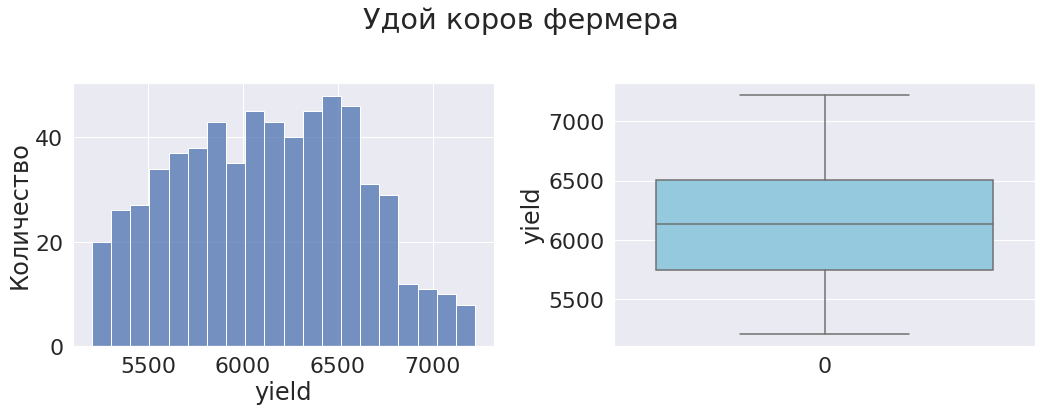

In [ ]:
vizualize_digit_variable(df_main, 'yield', 'Удой коров фермера')

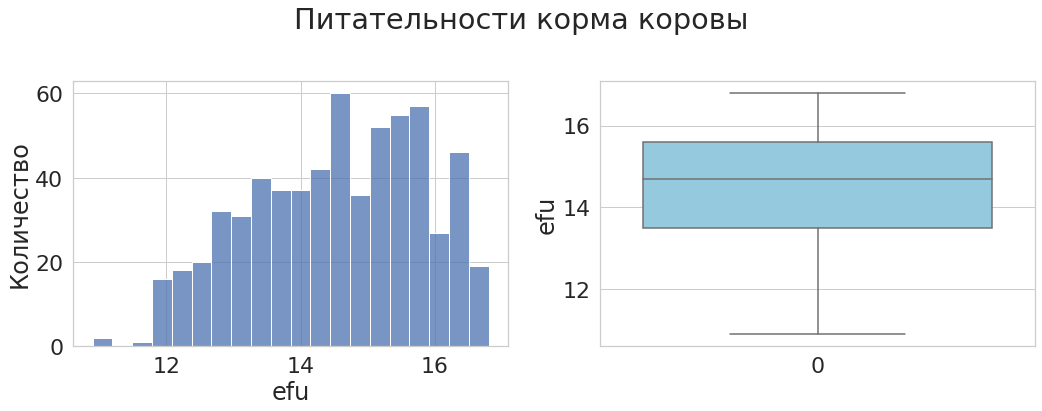

In [ ]:
vizualize_digit_variable(df_main, 'efu', 'Питательности корма коровы')

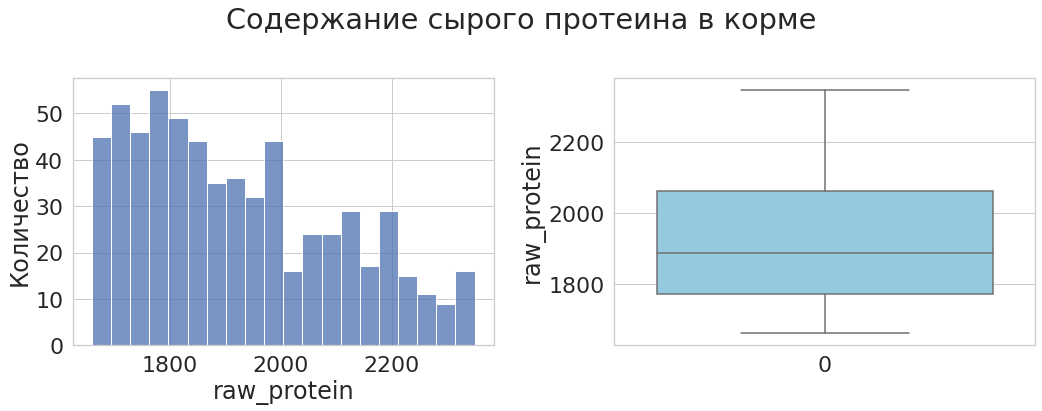

In [ ]:
vizualize_digit_variable(df_main, 'raw_protein', 'Содержание сырого протеина в корме')

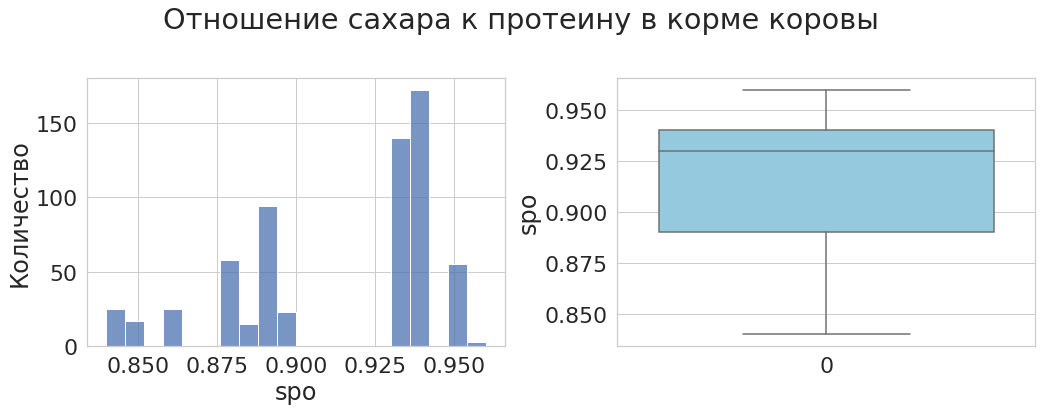

In [ ]:
vizualize_digit_variable(df_main, 'spo', 'Отношение сахара к протеину в корме коровы')

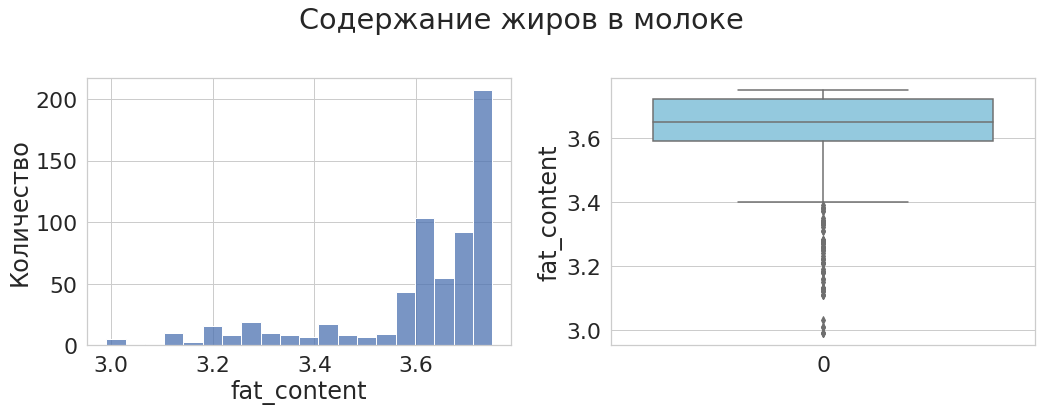

In [ ]:
vizualize_digit_variable(df_main, 'fat_content', 'Содержание жиров в молоке')

*Довольно много выбросов в данных в колонке "Содержание жира в молоке". Посмотрим, следует ли удалять все выбросы*

In [ ]:
# Использование межквартильного размаха (IQR)
Q1 = df_main['fat_content'].quantile(0.25)
Q3 = df_main['fat_content'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Верхняя граница: {upper_bound}")
print(f"Нижняя граница: {lower_bound}")
outliers = df_main[(df_main['fat_content'] < lower_bound) | (df_main['fat_content'] > upper_bound)]

percentage_outliers = (len(outliers) / len(df_main)) * 100
print(f"Процент выбросов (IQR): {percentage_outliers:.2f}%")

Верхняя граница: 3.915000000000001
Нижняя граница: 3.3949999999999996
Процент выбросов (IQR): 13.69%


*Количество выбросов не особо большое, чуть больше 10 % от всех данных в таблице. Думаю, что данные можно отсавить, а удалить можно пару строк, где значение меньше 3.1*

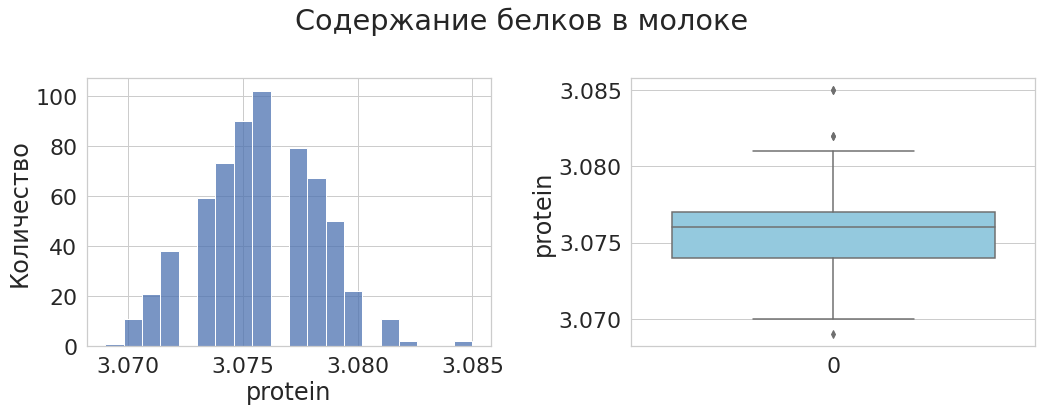

In [ ]:
vizualize_digit_variable(df_main, 'protein', 'Содержание белков в молоке')

*Очень мало выбросов в данных в колонке "Содержание белков в молоке". Дмуаю, если удалим эти аномальные данные, ничего страшного не будет. Их можно как оставить, так и удалить*

In [ ]:
# Использование межквартильного размаха (IQR)
Q1 = df_main['protein'].quantile(0.25)
Q3 = df_main['protein'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Верхняя граница: {upper_bound}")
print(f"Нижняя граница: {lower_bound}")
outliers = df_main[(df_main['protein'] < lower_bound) | (df_main['protein'] > upper_bound)]

percentage_outliers = (len(outliers) / len(df_main)) * 100
print(f"Процент выбросов (IQR): {percentage_outliers:.2f}%")

Верхняя граница: 3.0815
Нижняя граница: 3.0694999999999997
Процент выбросов (IQR): 0.80%


In [ ]:
# Индексы строк в df_main, которые нужно удалить (теперь корректно)
indexes_to_remove = df_main[(df_main['protein'] < lower_bound) | (df_main['protein'] > upper_bound)].index

# Соответствующие ID в df_main
ids_to_remove = df_main.loc[indexes_to_remove, 'id'].values

# Удаление строк из df_dad, используя эти ID
df_dad = df_dad[~df_dad['id'].isin(ids_to_remove)]

# Удаление строк из df_main
df_main = df_main[~df_main.index.isin(indexes_to_remove)]

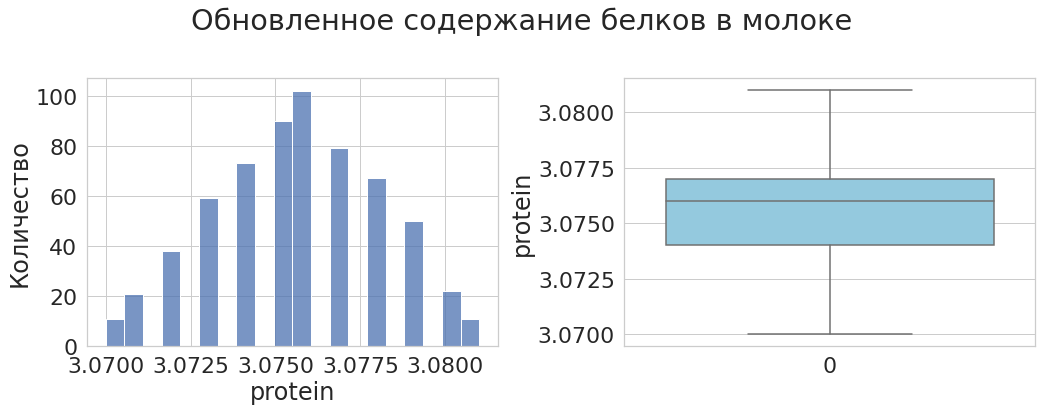

In [ ]:
vizualize_digit_variable(df_main, 'protein', 'Обновленное содержание белков в молоке')

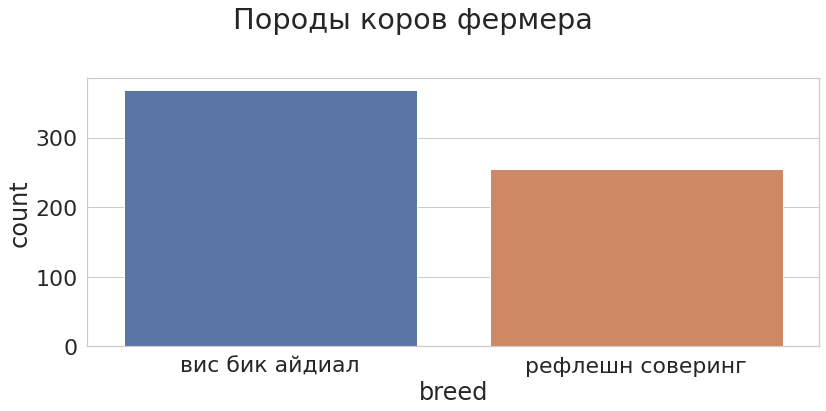

In [ ]:
vizualize_categor_variable(df_main, 'breed', 'Породы коров фермера')

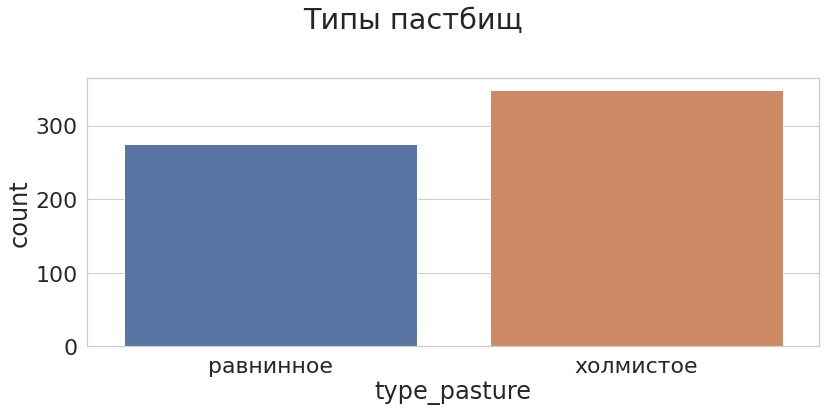

In [ ]:
vizualize_categor_variable(df_main, 'type_pasture', 'Типы пастбищ')

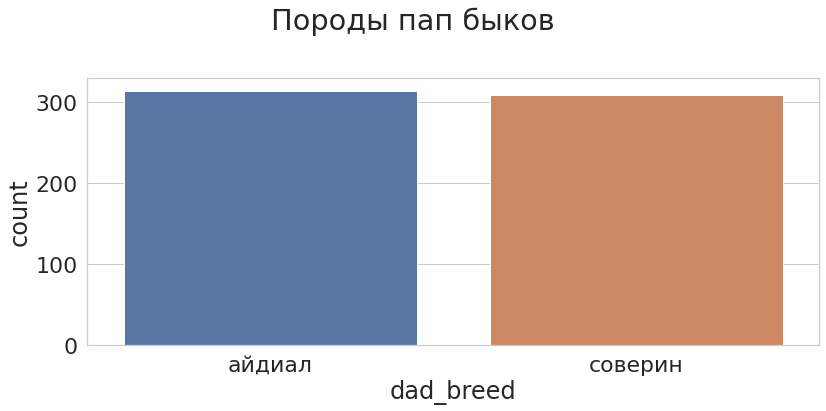

In [ ]:
vizualize_categor_variable(df_main, 'dad_breed', 'Породы пап быков')

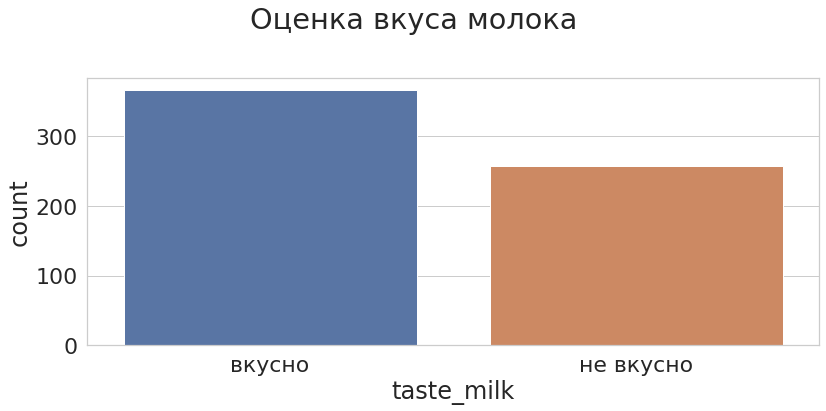

In [ ]:
vizualize_categor_variable(df_main, 'taste_milk', 'Оценка вкуса молока')

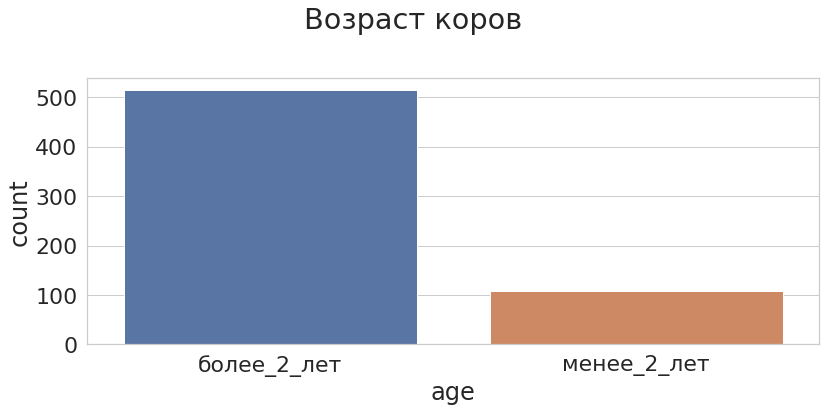

In [ ]:
vizualize_categor_variable(df_main, 'age', 'Возраст коров')

### Визуализация признаков df_dad

In [ ]:
# Статистическое описание таблицы
display(df_dad.describe(), df_dad.describe(include=[object]))

,id
count,623.000000
mean,315.219904
std,181.584881
min,1.000000
25%,158.500000
50%,315.000000
75%,472.000000
max,629.000000


,dad_name
count,623
unique,4
top,барин
freq,240


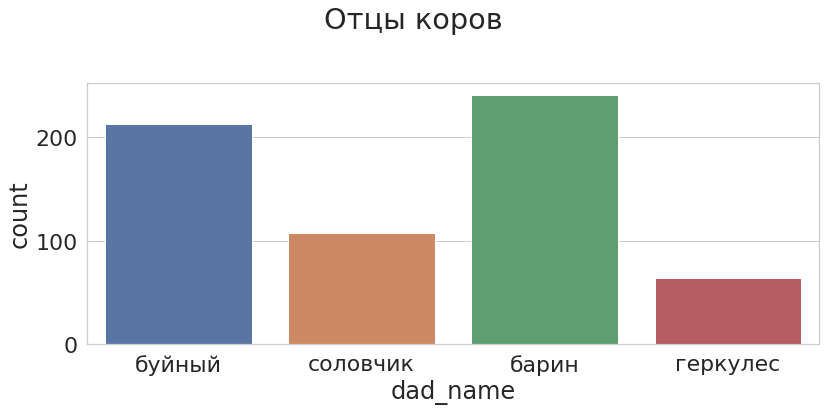

In [ ]:
vizualize_categor_variable(df_dad, 'dad_name', 'Отцы коров')

### Визуализация признаков df_cow

In [ ]:
# Статистическое описание таблицы
display(df_cow.describe(), df_cow.describe(include=[object]))

,fat_content,protein
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


,breed,type_pasture,dad_breed,dad_name,age
count,16,16,16,16,16
unique,2,2,2,4,2
top,рефлешн соверинг,холмистое,соверин,буйный,более_2_лет
freq,8,8,10,7,11


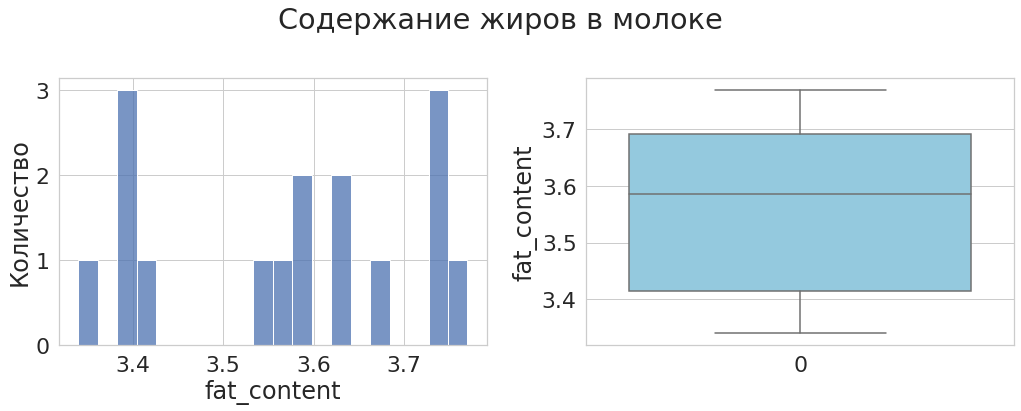

In [ ]:
vizualize_digit_variable(df_cow, 'fat_content', 'Содержание жиров в молоке')

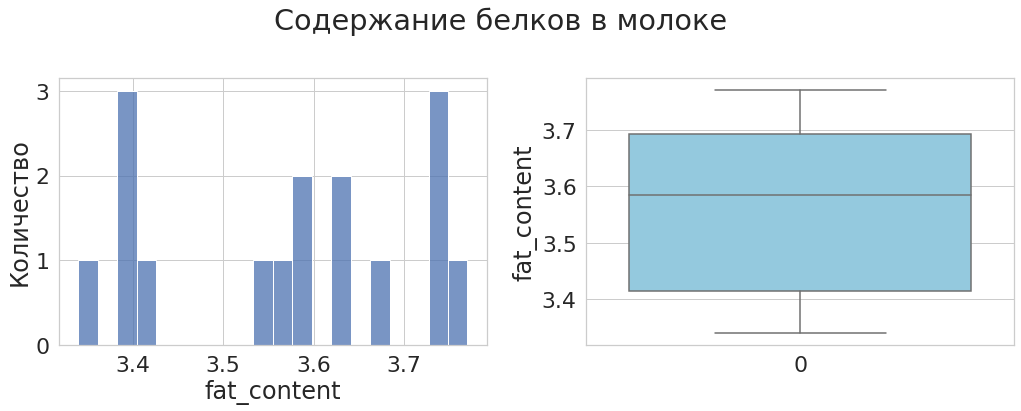

In [ ]:
vizualize_digit_variable(df_cow, 'fat_content', 'Содержание белков в молоке')

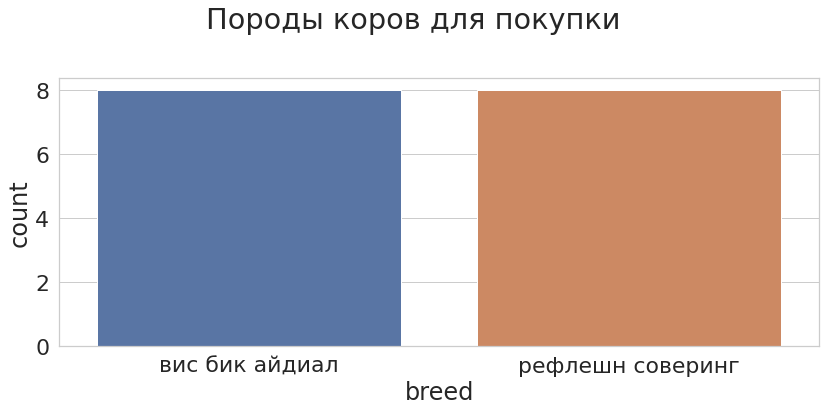

In [ ]:
vizualize_categor_variable(df_cow, 'breed', 'Породы коров для покупки')

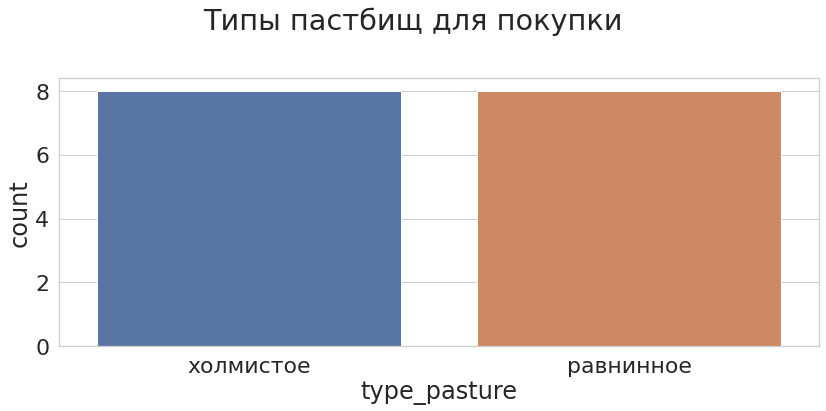

In [ ]:
vizualize_categor_variable(df_cow, 'type_pasture', 'Типы пастбищ для покупки')

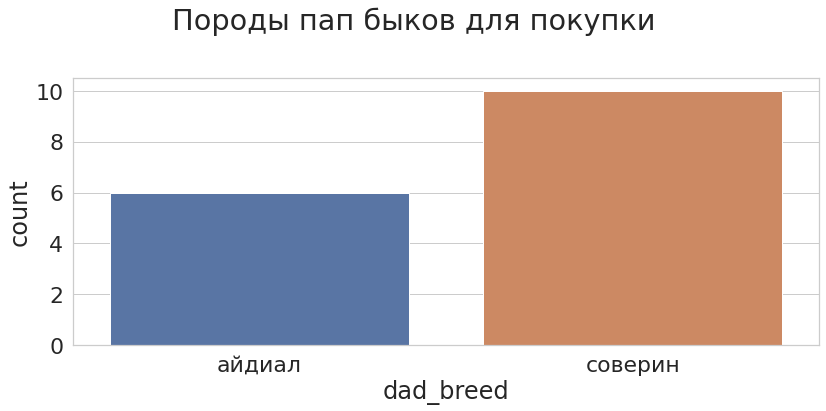

In [ ]:
vizualize_categor_variable(df_cow, 'dad_breed', 'Породы пап быков для покупки')

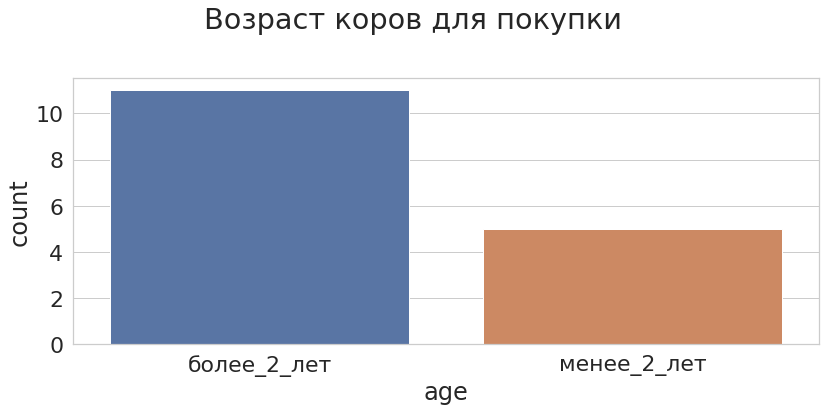

In [ ]:
vizualize_categor_variable(df_cow, 'age', 'Возраст коров для покупки')

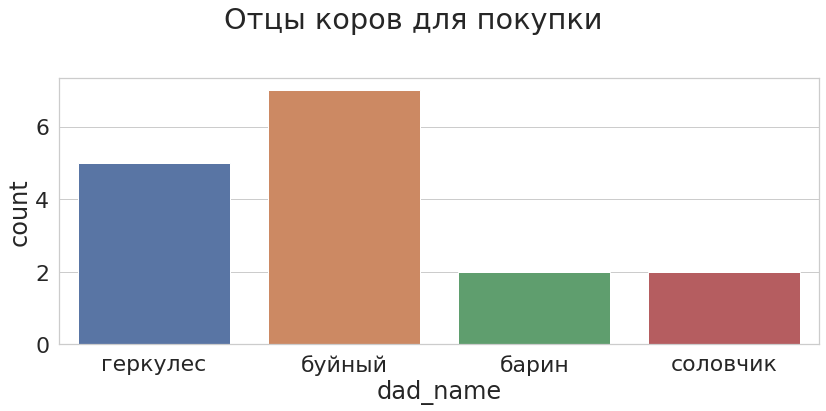

In [ ]:
vizualize_categor_variable(df_cow, 'dad_name', 'Отцы коров для покупки')

**Выводы по этапу "Исследовательской анализ данных"**

* Удалили (частично) выбросы в некоторых столбцах: Удой, Содержание жира в молоке, Содержание белков в молоке.

Данные о коровах фермера:
* Данные о удое распределены нормально. Средний удой коров более 6000 кг;
* График ЭКЕ смещен в право, среднее значение 14.7;
* График сырого протеина в коре коров смещен влево, среднее значнеие около 1900;
* Отношение протеина к сахару разделено на 2 части более и менее 0.9; Среднее значение 0.93;
* Типы пасдбищ, пород, пород отцов распределены поровну;
* Содержание жира в молоке в среднем 3.65. Среди данных наблюдаются выбросы лева от графика;
* Содержание белков в молоке распределено ормально, среднее значнеие 3;
* Вкусное молоко дает большая часть коров фермера;
* Больше всего коров старше 2 лет;

Данные о коровах для покупки схожи с данными о коровах фермера.


Не все признаки имеют нормально расспредление. Из всех признаков, только у признака "Содержание белка в молоке" имеется близкое к нормальному распредлению. все сотальные признаки имееют 2 и более пиков.

## Корреляционный анализ в таблице df_main

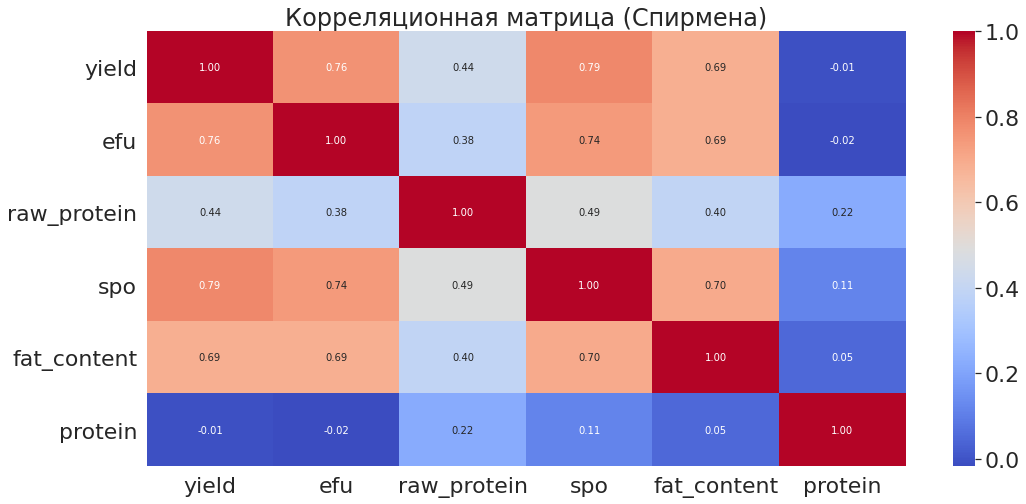

In [ ]:
# Список ичсловых признаков для вычисления корреляции
columns_to_correlate = ['yield', 'efu', 'raw_protein', 'spo', 'fat_content', 'protein']

# Вычисляем корреляционную матрицу Спирмена.
correlation_matrix = df_main[columns_to_correlate].corr(method='spearman')

# Создаем heatmap
plt.figure(figsize=(17, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 10})
plt.title('Корреляционная матрица (Спирмена)')
plt.show()

In [ ]:
# определим данные к количественным и к качественным
df_main.dtypes

id                int64
yield             int64
efu             float64
raw_protein       int64
spo             float64
breed            object
type_pasture     object
dad_breed        object
fat_content     float64
protein         float64
taste_milk       object
age              object
dtype: object

In [ ]:
#Целевой признак
target_feature = 'yield'
# Количественные признаки: числовые типы данных
numerical_features = df_main.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('id') # Удаляем 'id'
numerical_features.remove('yield')

# Категориальные признаки: все остальные типы данных
categorical_features = df_main.select_dtypes(exclude=['number']).columns.tolist()
# проверка
print("Количественные признаки:", numerical_features)
print("Категориальные признаки:", categorical_features)

Количественные признаки: ['efu', 'raw_protein', 'spo', 'fat_content', 'protein']
Категориальные признаки: ['breed', 'type_pasture', 'dad_breed', 'taste_milk', 'age']


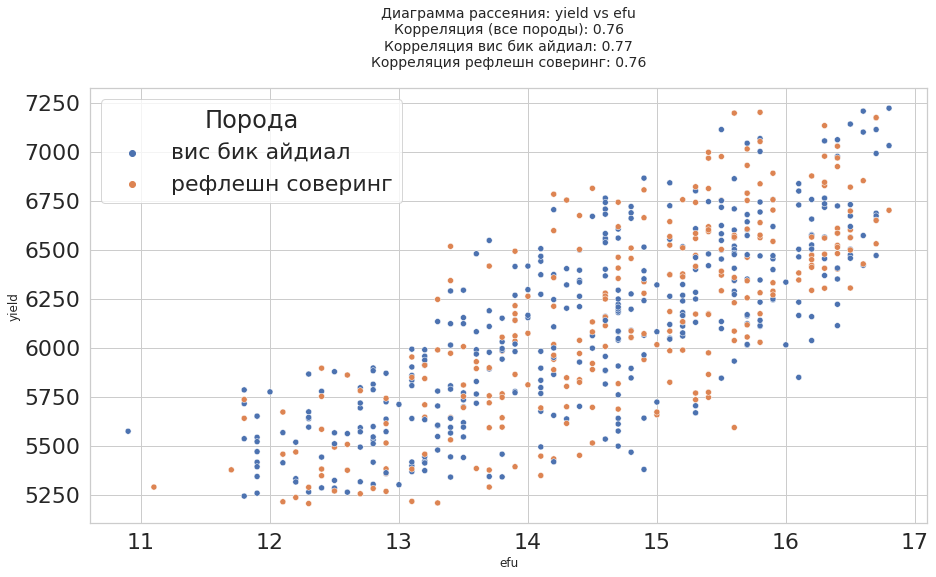

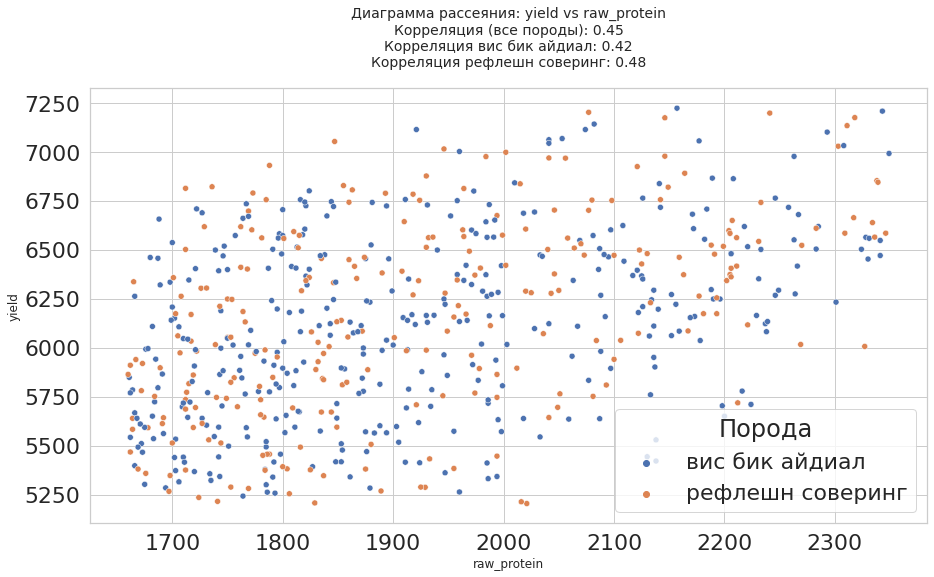

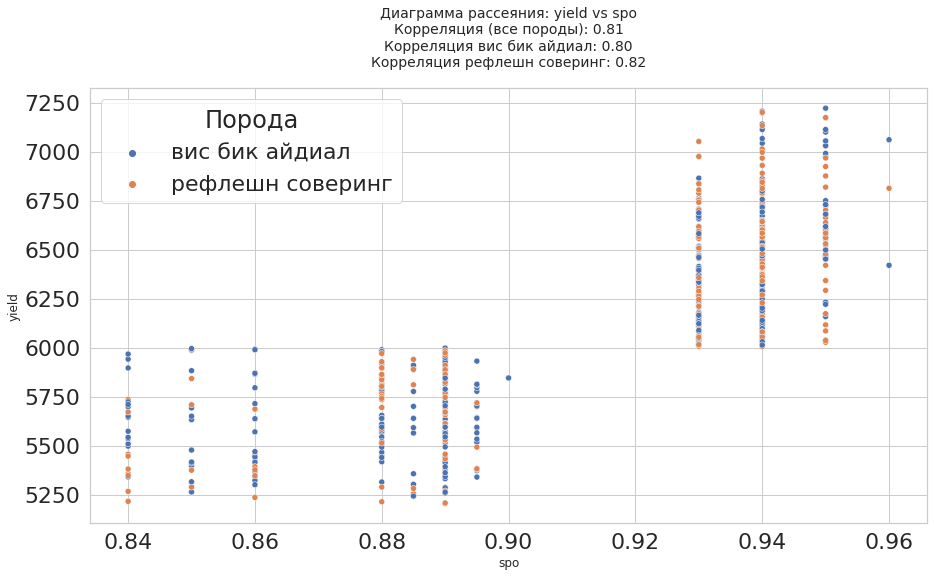

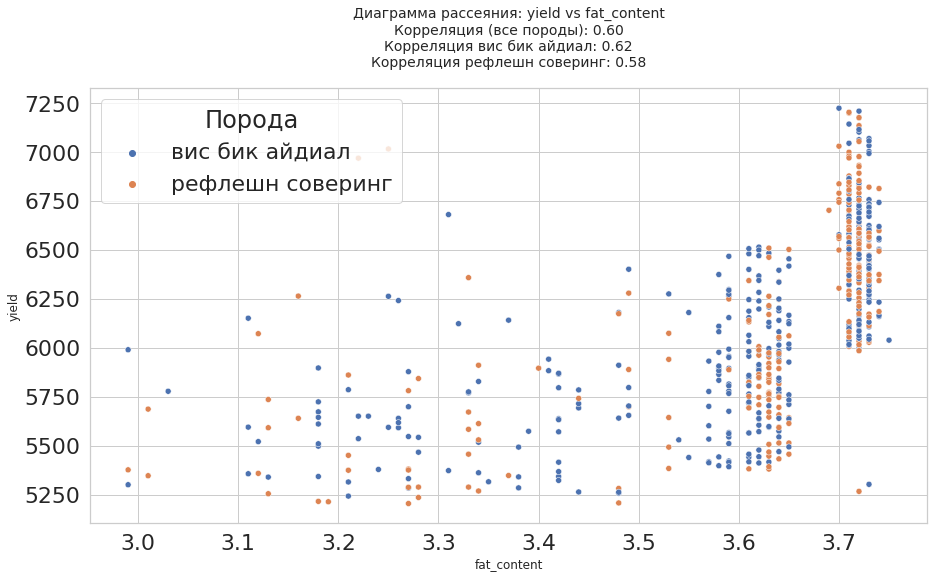

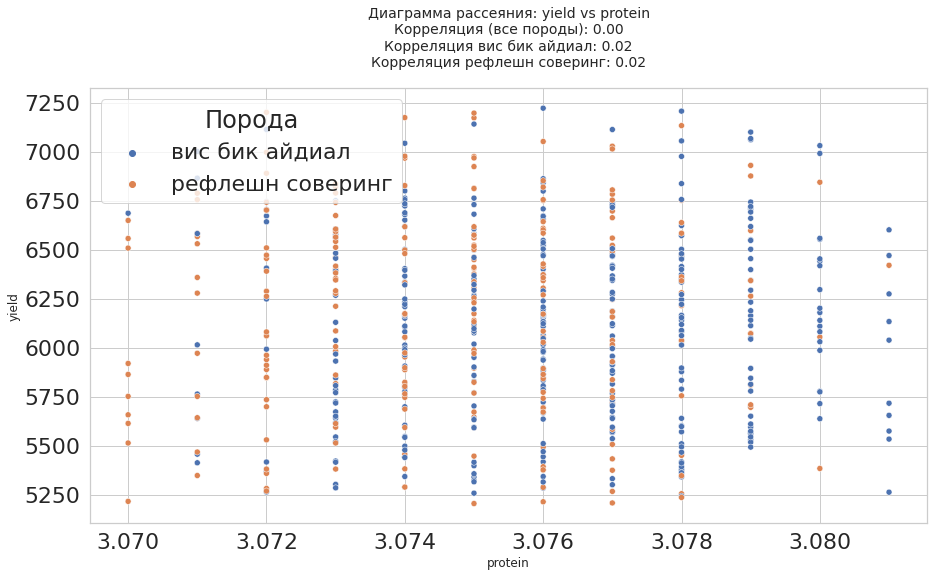

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x=feature, y=target_feature, hue='breed', data=df_main) # Относительно Породы
    # Группируем данные по породе
    correlations_by_breed = df_main.groupby('breed').apply(lambda x: x[feature].corr(x[target_feature]))

    # Добавляем корреляции к заголовку
    correlation_text = f"Корреляция (все породы): {df_main[feature].corr(df_main[target_feature]):.2f}\n"
    for breed, correlation in correlations_by_breed.items():
        correlation_text += f"Корреляция {breed}: {correlation:.2f}\n"


    # Подписи осей и заголовок
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target_feature, fontsize=12)
    plt.title(f'Диаграмма рассеяния: {target_feature} vs {feature}\n{correlation_text}', fontsize=14)
    plt.legend(title='Порода')

    plt.show()


**Выводы по этапу "Корреляционный анализ"** (исправить)

* Исследование показало, что связь целевого признака "Удоя молока" линейная с признаками: Энергетическая кормовая единица и Сырой протеин;
* СПО более похож на категориальный признак, так как данные распределены по определенным значениям;
* Связь целевого признака с ЭКЕ лучше всего описывает дуга. При возведении ЭКЕ в квадрат связь описывается прямой лучше чем связь ЭКЕ с удоем;
* Корреляция целевого с содержанием жира в молоке высокая, что объясняется тем, что большая часть коров дает жирное молоко;
* Связь удоя с содержанием белка не наблюдается;
* Мультиколинеарность не наблюдается.

## Обучение модели линейной регрессии

***Первая модель LinearRegression***

In [ ]:
RANDOM_STATE = 42
def preprocess_data(df, target_column='yield'):
    """
    Предварительная обработка данных: разделение на тренировочный и тестовый наборы,
    кодирование категориальных и масштабирование числовых признаков.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    return X_train, X_test, y_train, y_test

def encode_categorical_features(X_train, X_test, categorical_features):
    """Кодирование категориальных признаков с помощью OneHotEncoder."""
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_encoded = encoder.fit_transform(X_train[categorical_features])
    X_test_encoded = encoder.transform(X_test[categorical_features])
    encoder_col_names = encoder.get_feature_names(categorical_features)
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_col_names)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_col_names)
    return X_train_encoded, X_test_encoded

def scale_numerical_features(X_train, X_test, numerical_features):
    """Масштабирование числовых признаков с помощью StandardScaler."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[numerical_features])
    X_test_scaled = scaler.transform(X_test[numerical_features])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features)
    return X_train_scaled, X_test_scaled

def train_and_evaluate_model(X_train, y_train, X_test, y_test):
    """Обучение модели линейной регрессии и оценка её качества."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test, y_test)
    return predictions, mse, mae, rmse, r2

def plot_residuals(y_test, predictions):
    """Построение графиков распределения остатков и диаграммы рассеяния."""
    residuals = y_test - predictions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    axes[0].hist(residuals, bins=20)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

R^2: 0.8052
MSE: 42679.1575
MAE: 160.4913
RMSE: 206.5893


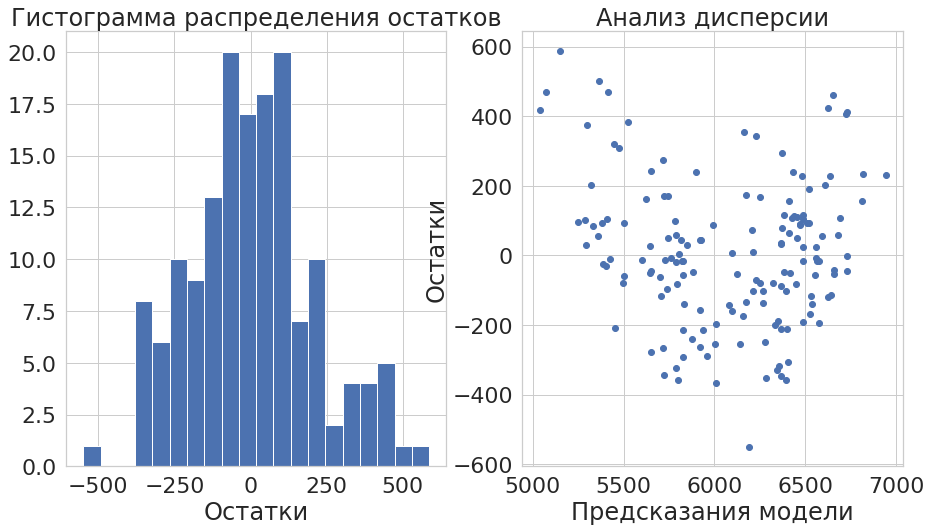

In [ ]:
# Выбираем нужные признаки
selected_features = ['efu', 'raw_protein', 'spo', 'breed', 'type_pasture', 'dad_breed', 'age']
X = df_main[selected_features]
y = df_main['yield']  # Целевая переменная - yield

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = preprocess_data(df_main, target_column='yield')

# Определяем категориальные и числовые признаки ИЗ УЖЕ РАЗДЕЛЕННЫХ ДАННЫХ
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Кодирование категориальных и масштабирование числовых признаков
X_train_encoded, X_test_encoded = encode_categorical_features(X_train, X_test, categorical_features)
X_train_scaled, X_test_scaled = scale_numerical_features(X_train, X_test, numerical_features)

# Объединение обработанных данных
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Обучение модели и оценка
predictions, mse, mae, rmse, r2 = train_and_evaluate_model(X_train_final, y_train, X_test_final, y_test)

# Вывод результатов
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Построение графиков остатков
plot_residuals(y_test, predictions)

*Полученная модель линейной регрессии демонстрирует точность 80%. Однако, анализ остатков указывает на нелинейность в данных (неравномерное распределение остатков, отсутствие линейной зависимости на диаграмме рассеяния).*

***Вторая модель LinearRegression***

*подготовка данных*

In [ ]:
# Создвем новый датафрейм, скопировав полностью исходный
df_main_model_2 = df_main[:]
df_main_model_2.head()

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


*СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав эту границу*

In [ ]:
# Преобразования spo в категориальный признак
df_main_model_2["spo"] = df_main_model_2["spo"].apply(lambda x: 'более_0.91' if x > 0.9 else 'менее_0.91')
df_main_model_2.head()

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
0,1,5863,14.2,1743,менее_0.91,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,менее_0.91,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,менее_0.91,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,менее_0.91,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,менее_0.91,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
# Преобразования efu в квадрат
df_main_model_2["efu"] = df_main_model_2["efu"]**2
df_main_model_2.head()

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
0,1,5863,201.64,1743,менее_0.91,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,163.84,2138,менее_0.91,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,196.00,1854,менее_0.91,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,153.76,2012,менее_0.91,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,163.84,1675,менее_0.91,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


*обучение второй модели*

R^2: 0.8438
MSE: 34228.8023
MAE: 147.9342
RMSE: 185.0103


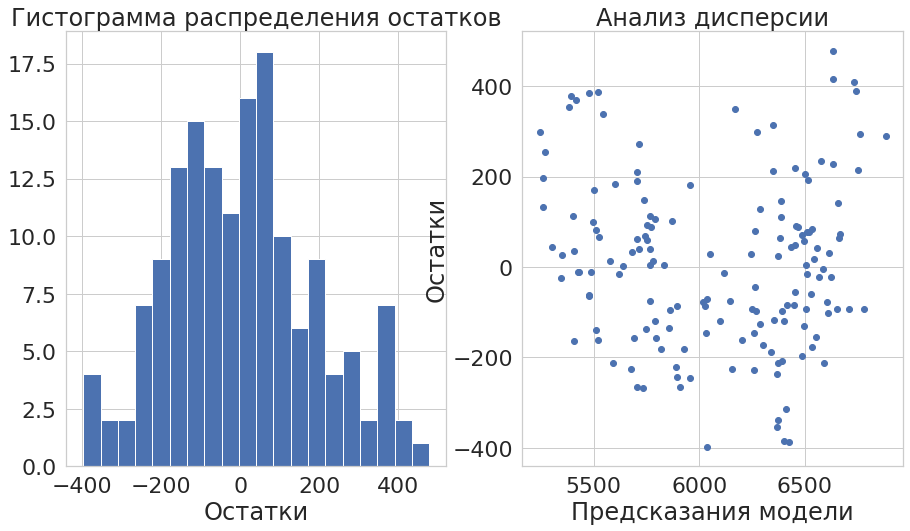

In [ ]:
# Выбираем нужные признаки
selected_features = ['efu', 'raw_protein', 'spo', 'breed', 'type_pasture', 'dad_breed', 'age']
X = df_main_model_2[selected_features]
y = df_main_model_2['yield']  # Целевая переменная - yield

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = preprocess_data(df_main_model_2, target_column='yield')

# Определяем категориальные и числовые признаки ИЗ УЖЕ РАЗДЕЛЕННЫХ ДАННЫХ
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Кодирование категориальных и масштабирование числовых признаков
X_train_encoded, X_test_encoded = encode_categorical_features(X_train, X_test, categorical_features)
X_train_scaled, X_test_scaled = scale_numerical_features(X_train, X_test, numerical_features)

# Объединение обработанных данных
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Обучение модели и оценка
predictions, mse, mae, rmse, r2 = train_and_evaluate_model(X_train_final, y_train, X_test_final, y_test)

# Вывод результатов
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Построение графиков остатков
plot_residuals(y_test, predictions)

*Вторая модель линейной регрессии демонстрирует точность 84%. Уже лучше, По гистограмме распредления остатков видно, что у нас распределние стало получше, но пока не равномерно, есть смещение. И график анализа дсипресии показывает, что нет линейной заивимости еще*

***Третья модель LinearRegression***

*подготовка данных*

Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.

In [ ]:
# добавление столбца с именами пап коров
df_main_model_3 = df_main_model_2[:]
df_main_model_3 = df_main_model_2.merge(df_dad, on='id')
df_main_model_3.head()

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age,dad_name
0,1,5863,201.64,1743,менее_0.91,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,163.84,2138,менее_0.91,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,196.00,1854,менее_0.91,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,153.76,2012,менее_0.91,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,163.84,1675,менее_0.91,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин


*перед тем, как обучить модель нудно проверить, нет ли строк с пропусками*

In [ ]:
print(f"Кол-во пропусков: {df_main_model_3['dad_name'].isna().sum()}")

Кол-во пропусков: 0


*Обучение третьей модели*

R^2: 0.8467
MSE: 33585.2521
MAE: 143.7041
RMSE: 183.2628


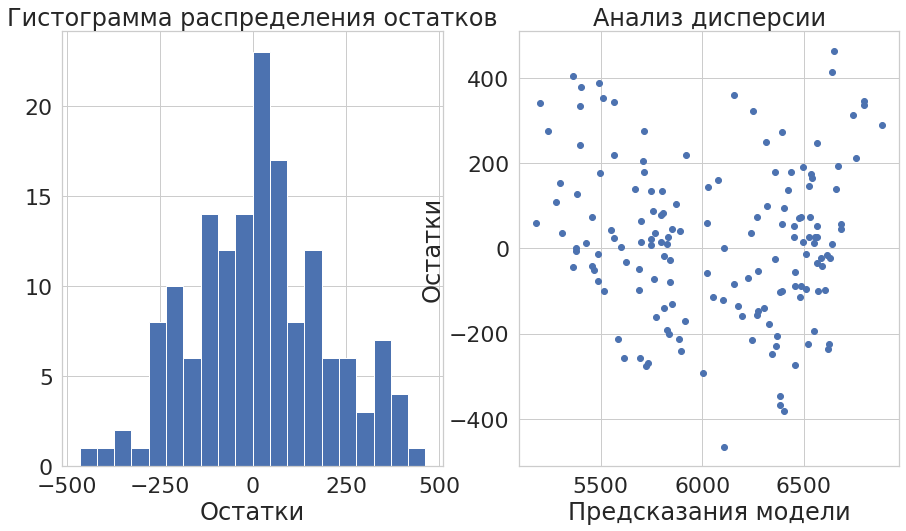

In [ ]:
# Выбираем нужные признаки
selected_features = ['efu', 'raw_protein', 'spo', 'breed', 'type_pasture', 'dad_breed', 'age']
X = df_main_model_3[selected_features]
y = df_main_model_3['yield']  # Целевая переменная - yield

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = preprocess_data(df_main_model_3, target_column='yield')

# Определяем категориальные и числовые признаки ИЗ УЖЕ РАЗДЕЛЕННЫХ ДАННЫХ
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Кодирование категориальных и масштабирование числовых признаков
X_train_encoded, X_test_encoded = encode_categorical_features(X_train, X_test, categorical_features)
X_train_scaled, X_test_scaled = scale_numerical_features(X_train, X_test, numerical_features)

# Объединение обработанных данных
X_train_final = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Обучение модели и оценка
predictions, mse, mae, rmse, r2 = train_and_evaluate_model(X_train_final, y_train, X_test_final, y_test)

# Вывод результатов
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Построение графиков остатков
plot_residuals(y_test, predictions)

*Третья модель линейной регрессии демонстрирует точность 84%. Примерно также как вторая модель, чуть может лучше. По гистограмме распредления остатков видно, что у нас распределние стало получше, но пока не равномерно, есть смещение. И график анализа дсипресии показывает, что нет линейной заивимости еще*

**Вывод: лучше все обучилась третья модель**

In [ ]:
from scipy.stats import sem, norm

mean_pred = np.mean(predictions)
margin_of_error = norm.ppf(0.975) * sem(predictions)
lower_bound = mean_pred - margin_of_error
upper_bound = mean_pred + margin_of_error

print(f'Доверительный интервал лучшей модели = {lower_bound}, {upper_bound}')

Доверительный интервал лучшей модели = 6000.842905133481, 6140.964482894431


## Создание модели для прогноза удой коров

Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): Возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%.

In [ ]:
# Обработка данных для прогнозирования
increase_percent = 0.05
mean_EKE = df_main['efu'].mean() * (1 + increase_percent)
mean_protein = df_main['raw_protein'].mean() * (1 + increase_percent)
mean_SPO = df_main['spo'].mean() * (1 + increase_percent)

df_cow['efu'] = mean_EKE
df_cow['raw_protein'] = mean_protein
df_cow['spo'] = mean_SPO

In [ ]:
df_cow.head()

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu,raw_protein,spo
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.958947
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276742,2019.77191,0.958947
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.958947
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276742,2019.77191,0.958947
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276742,2019.77191,0.958947


In [ ]:
df_main_model_3.head()

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age,dad_name
0,1,5863,201.64,1743,менее_0.91,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,буйный
1,2,5529,163.84,2138,менее_0.91,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,соловчик
2,3,5810,196.00,1854,менее_0.91,рефлешн соверинг,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,барин
3,4,5895,153.76,2012,менее_0.91,рефлешн соверинг,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,буйный
4,5,5302,163.84,1675,менее_0.91,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,барин


*Обучение модели для прогноза удоя*

In [ ]:
# Названия столбцов
cat_col_names = ['breed', 'type_pasture', 'dad_breed']
num_col_names = ['efu', 'raw_protein', 'spo']

# Подготовка данных для модели
RANDOM_STATE = 42

X = df_main.drop('yield', axis=1)
y = df_main['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

# Кодирование и масштабирование
encoder = OneHotEncoder(drop='first',sparse=False)
X_train_encoded = encoder.fit_transform(X_train[cat_col_names])
X_test_encoded = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names(cat_col_names)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Объединение закодированных и масштабированных данных
X_train_prepared = np.concatenate((X_train_encoded, X_train_scaled), axis=1)
X_test_prepared = np.concatenate((X_test_encoded, X_test_scaled), axis=1)

# Обучение модели
model = LinearRegression()
model.fit(X_train_prepared, y_train)

#Подготовка данных для прогнозирования
X_cow_buy_encoded = encoder.transform(df_cow[cat_col_names])
X_cow_buy_scaled = scaler.transform(df_cow[num_col_names])
X_cow_buy_prepared = np.concatenate((X_cow_buy_encoded, X_cow_buy_scaled), axis=1)

# Прогнозирование
predictions = model.predict(X_cow_buy_prepared).round(2)

#Добавление прогнозов в df_cow_buy
df_cow['yield'] = predictions

In [ ]:
# Выводим датафрейм с предсказаниями
df_cow

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu,raw_protein,spo,yield
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.958947,6680.29
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276742,2019.77191,0.958947,6351.53
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.958947,6375.29
3,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,15.276742,2019.77191,0.958947,6704.05
4,рефлешн соверинг,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,15.276742,2019.77191,0.958947,6658.87
5,рефлешн соверинг,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,15.276742,2019.77191,0.958947,6375.29
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.276742,2019.77191,0.958947,6351.53
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276742,2019.77191,0.958947,6704.05
10,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.055,более_2_лет,15.276742,2019.77191,0.958947,6396.71
11,рефлешн соверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,15.276742,2019.77191,0.958947,6375.29


**Выводы по этапу Линейной регрессии:**
    
* Построены модели линейной регрессии по данным из датасета farm_main.csv и определена по значениям метрик более точная;
* Полученное значение коэффициента R2 = 0.84;
* Применена лучшая по качеству и по точности модель к данным из датасета cow_buy_old.csv и получен прогноз удоя коров;

## Обучение модели логистической регрессии

In [ ]:
df_main_logress = df_main[:]

In [ ]:
# выполним преобразование целевого признака в числовой тип данных
df_main_logress['taste_milk'] = df_main_logress['taste_milk'].map({'вкусно': 1, 'не вкусно': 0}) # Преобразование в числовые метки
df_main_logress = df_main_logress.dropna() # Удаляем строки с пропущенными значениями
df_main_logress.head()

,id,yield,efu,raw_protein,spo,breed,type_pasture,dad_breed,fat_content,protein,taste_milk,age
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,1,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,1,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешн соверинг,холмистое,соверин,3.59,3.074,0,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешн соверинг,холмистое,айдиал,3.40,3.075,0,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,1,менее_2_лет


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, переводим таргет в численный вид.

</div>


*Обучение модели*

Accuracy: 0.6160
Recall: 0.7971
Precision: 0.6180


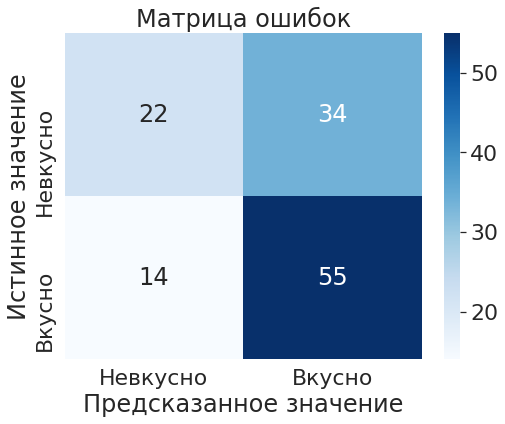

              precision    recall  f1-score   support

           0       0.61      0.39      0.48        56
           1       0.62      0.80      0.70        69

    accuracy                           0.62       125
   macro avg       0.61      0.59      0.59       125
weighted avg       0.61      0.62      0.60       125



In [ ]:
RANDOM_STATE = 42
# Отбор признака и выделение целевого признака
X = df_main_logress.drop(['id', 'yield', 'taste_milk'], axis=1)
y = df_main_logress['taste_milk']
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Кодирование категориальных и масштабирование числовых признаков
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

encoder = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

X_train_final = np.concatenate((X_train_encoded, X_train_scaled), axis=1)
X_test_final = np.concatenate((X_test_encoded, X_test_scaled), axis=1)

clf = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X_train_final, y_train)
y_pred = clf.predict(X_test_final)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Невкусно', 'Вкусно'], yticklabels=['Невкусно', 'Вкусно'])
plt.xlabel('Предсказанное значение')
plt.ylabel('Истинное значение')
plt.title('Матрица ошибок')
plt.show()

print(classification_report(y_test, y_pred))

*Анализ модели:*
    
* Модель предсказывает 55 верных положительных значений и 34 не верных положительных;
* Для минимизации рисков необходимо сократить количество не верных положительных предсказаний, так как фермеру важно получить коров с вкусным молоком и важно не ошибиться с положительными предсказаниями.

*Обработка модели*

In [ ]:
# Выводим пороги классификации
y_prob = clf.predict_proba(X_test_final)[:, 1]

data = pd.DataFrame(zip(y_test, y_prob),
             columns = ['y_valid', 'y_prob']).sort_values(by='y_prob',ascending=False)

data.head()

,y_valid,y_prob
115,1,0.823315
83,1,0.813682
32,1,0.812170
112,1,0.805213
26,1,0.793835


In [ ]:
# Задаем диапазон порогов от 0.1 до 0.99 с шагом, обеспечивающим 15 значений.
thresholds = np.linspace(0.1, 0.99, 15)

for threshold in thresholds:
    # Преобразуем вероятности в бинарные предсказания на основе текущего порога.
    y_pred_thresh = (y_prob >= threshold).astype(int)

    # Вычисляем матрицу ошибок (confusion matrix) для текущего порога.
    cm = confusion_matrix(y_test, y_pred_thresh)

    # Извлекаем значения из матрицы ошибок:
    # tn - True Negative (истинно отрицательные)
    # fp - False Positive (ложно положительные)
    # fn - False Negative (ложно отрицательные)
    # tp - True Positive (истинно положительные)
    tn, fp, fn, tp = cm.ravel()

    # Вычисляем Precision и Recall.  Обработка случая деления на ноль.
    precision_t = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_t = tp / (tp + fn) if (tp + fn) > 0 else 0

    print(f"Порог: {threshold:.2f}, TP: {tp}, FP: {fp}, FN: {fn}, Precision: {precision_t:.4f}, Recall: {recall_t:.4f}")

Порог: 0.10, TP: 69, FP: 56, FN: 0, Precision: 0.5520, Recall: 1.0000
Порог: 0.16, TP: 69, FP: 56, FN: 0, Precision: 0.5520, Recall: 1.0000
Порог: 0.23, TP: 69, FP: 56, FN: 0, Precision: 0.5520, Recall: 1.0000
Порог: 0.29, TP: 69, FP: 55, FN: 0, Precision: 0.5565, Recall: 1.0000
Порог: 0.35, TP: 66, FP: 51, FN: 3, Precision: 0.5641, Recall: 0.9565
Порог: 0.42, TP: 63, FP: 43, FN: 6, Precision: 0.5943, Recall: 0.9130
Порог: 0.48, TP: 55, FP: 36, FN: 14, Precision: 0.6044, Recall: 0.7971
Порог: 0.55, TP: 48, FP: 27, FN: 21, Precision: 0.6400, Recall: 0.6957
Порог: 0.61, TP: 36, FP: 13, FN: 33, Precision: 0.7347, Recall: 0.5217
Порог: 0.67, TP: 28, FP: 6, FN: 41, Precision: 0.8235, Recall: 0.4058
Порог: 0.74, TP: 20, FP: 1, FN: 49, Precision: 0.9524, Recall: 0.2899
Порог: 0.80, TP: 4, FP: 0, FN: 65, Precision: 1.0000, Recall: 0.0580
Порог: 0.86, TP: 0, FP: 0, FN: 69, Precision: 0.0000, Recall: 0.0000
Порог: 0.93, TP: 0, FP: 0, FN: 69, Precision: 0.0000, Recall: 0.0000
Порог: 0.99, TP: 0, 

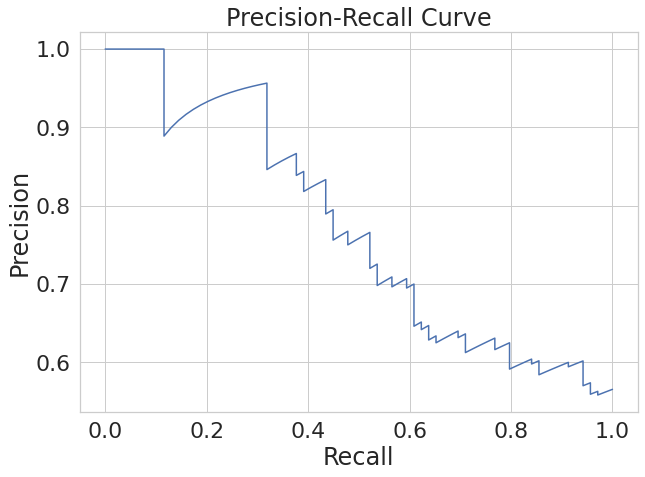

In [ ]:
# Вычисляем Precision, Recall и пороги для кривой Precision-Recall.
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Создаем фигуру и оси для графика.
fig, ax = plt.subplots(figsize=(10, 7))  # Устанавливаем размер графика здесь

# Строим кривую Precision-Recall.
ax.plot(recall, precision)

# Устанавливаем заголовок и подписи осей.
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

# Отображаем график.
plt.show()

Accuracy =  0.5
Precision =  1.0
Recall =  0.09


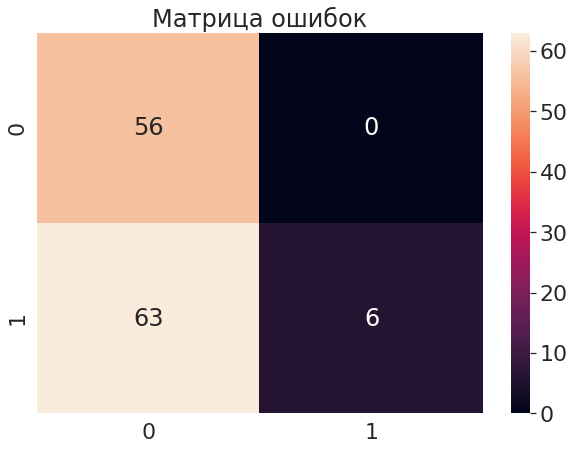

In [ ]:
porog = 0.79
# Вычисляем Accuracy, Precision и Recall для заданного порога (porog)
acc = accuracy_score(y_test, [1 if x >= porog else 0 for x in y_prob]).round(2)
precision = precision_score(y_test, [1 if x >= porog else 0 for x in y_prob]).round(2)
recall = recall_score(y_test, [1 if x >= porog else 0 for x in y_prob]).round(2)

# Создаем график матрицы ошибок
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, [1 if x >= porog else 0 for x in y_prob])

sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Матрица ошибок')

# Выводим метрики
print('Accuracy = ', acc)
print('Precision = ', precision)
print('Recall = ', recall)

*Спрогнозируем вкус молока коров, которых фермер хочет купить*

In [ ]:
# Определение имен категориальных и числовых столбцов
cat_col_names = ['breed', 'type_pasture', 'dad_breed', 'age']
num_col_names = ['efu', 'raw_protein', 'fat_content' , 'protein', 'spo']
RANDOM_STATE = 42

# X - признаки, y - целевая переменная
X = df_main_logress.drop('taste_milk', axis=1)
y = df_main_logress['taste_milk']
X_cow = df_cow # Данные о коровах, для которых нужно сделать предсказание

# Разбиение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  random_state=RANDOM_STATE)

# Кодирование категориальных признаков с помощью OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_ohe = encoder.fit_transform(X_train[cat_col_names])
X_cow_ohe = encoder.transform(X_cow[cat_col_names]) # Применение того же кодировщика к новым данным

encoder_col_names = encoder.get_feature_names(cat_col_names)

# Масштабирование числовых признаков с помощью StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train[num_col_names])
X_cow_scaled = scaler.transform(X_cow[num_col_names]) # Применение того же масштабирования к новым данным

# Преобразование массивов NumPy в DataFrame
X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow_ohe = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)
X_cow_scaled = pd.DataFrame(X_cow_scaled, columns=num_col_names)

# Объединение обработанных категориальных и числовых признаков
X_train = pd.concat([X_ohe, X_scaled], axis=1)
X_cow = pd.concat([X_cow_ohe, X_cow_scaled], axis=1)

# Обучение логистической регрессии
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

# Предсказание вероятностей для новых данных
y_pred = clf.predict_proba(X_cow)[:,1]

# Добавление предсказаний в DataFrame с данными о коровах
df_cow['y_pred'] = y_pred

# Бинаризация предсказаний на основе порога (porog - должен быть определен ранее)
df_cow['taste_milk'] = df_cow['y_pred'].apply(lambda x: 'taste_milk' if x >= porog else 'no_taste_milk')

# Сортировка коров по предсказанной вероятности
df_cow = df_cow.sort_values(by = ['y_pred'], ascending = False)

# Удаление временного столбца с вероятностями
df_cow = df_cow.drop(columns='y_pred')
df_cow

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu,raw_protein,spo,yield,taste_milk
16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,15.276742,2019.77191,0.958947,6396.71,taste_milk
13,вис бик айдиал,холмистое,соверин,барин,3.42,3.075,менее_2_лет,15.276742,2019.77191,0.958947,6396.71,no_taste_milk
9,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,15.276742,2019.77191,0.958947,6704.05,no_taste_milk
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,15.276742,2019.77191,0.958947,6680.29,no_taste_milk
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,15.276742,2019.77191,0.958947,6351.53,no_taste_milk
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,15.276742,2019.77191,0.958947,6351.53,no_taste_milk
2,рефлешн соверинг,равнинное,соверин,барин,3.59,3.074,более_2_лет,15.276742,2019.77191,0.958947,6375.29,no_taste_milk
18,вис бик айдиал,равнинное,соверин,буйный,3.34,3.069,более_2_лет,15.276742,2019.77191,0.958947,6351.53,no_taste_milk
15,рефлешн соверинг,холмистое,айдиал,буйный,3.40,3.065,более_2_лет,15.276742,2019.77191,0.958947,6704.05,no_taste_milk
11,рефлешн соверинг,равнинное,соверин,геркулес,3.73,3.073,более_2_лет,15.276742,2019.77191,0.958947,6375.29,no_taste_milk


In [ ]:
# Выводим коров с вкусным молоком
df_cow[df_cow['taste_milk'] == 'taste_milk']

,breed,type_pasture,dad_breed,dad_name,fat_content,protein,age,efu,raw_protein,spo,yield,taste_milk
16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,15.276742,2019.77191,0.958947,6396.71,taste_milk


*Среди коров найдена одна корова, которая может дать более 6000 кг вкусного молока. Ее фермер может купить не опасаять за ложно положительные результаты модели и большой вероятностью получит прибыль.*

## Итоговые выводы

В ходе работы были изучены данные о коровах фермера, именах их отцов и коровах для покупки.

Выполнено изучение исходных данных;

В них выявлены и обработаны пропуски, дебликаты, аномалии и изменены типы данных;
Название столбцов приведены к единообразию.
Выполнен исследовательский анализ данных;

В среднем коровы фермера дают более 6000 кг молока;
Коровы получают питательный корм с низким содержанием протеина;
Породы коров, их отцов и типы пасдбищ разделены пополам между скотом фермера
Коровы фермера в среднем дают молоко с жирностью 3.65 и содержанем белка 3.07;
Молоко 58.9% коров фермер считает вкусным;
Средний возраст коров фермера более 2 лет;
Больше всего коров имеют отцов Геркулес и Буйный;
Данные о коровах для покупки сходны с данными о коровах фермера.


Исследование показало, что связь целевого признака "Удоя молока" линейная с признаками: Энергетическая кормовая единица и Сырой протеин;
Связь целевого признака с другими признаками не линейная;
Мультиколинеарность не наблюдается.


Модель линейной регерссии отработала довольно неплохо. в Качестве рекомендаций можно добавить улучшить зависомсти меду ключевыми параметрами.

Для модели классификации Анализ результатов моделирования показал, что качество модели классификации находится на низком уровне. Необходимо отметить, что низкая точность может быть связана с недостатком релевантных признаков в имеющемся наборе данных. Дальнейшие исследования должны быть направлены на поиск и добавление новых признаков, а также на тестирование различных моделей машинного обучения для определения оптимального подхода к решению поставленной задачи. Необходимость дополнительных исследований и сбора данных делает окончательные выводы о возможности достижения высокой точности предсказания преждевременными.